In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

from keras.layers import Flatten #Objasni
from keras.layers import Dropout #Objasni
from keras.layers.convolutional import Conv2D #Objasni
from keras.layers.convolutional import MaxPooling2D #Objasni

from keras.models import Model #Objasni

In [0]:
np.random.seed(0)

In [69]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 

(60000, 28, 28)
(10000, 28, 28)


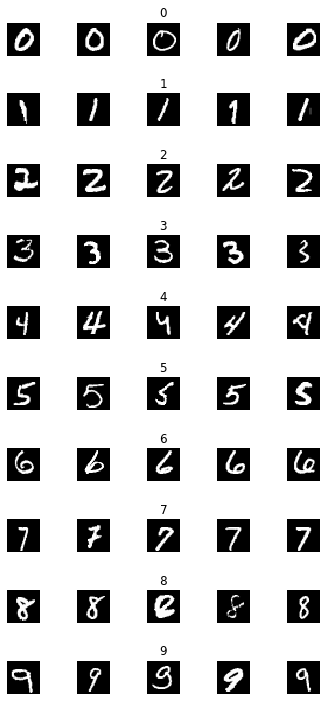

In [70]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


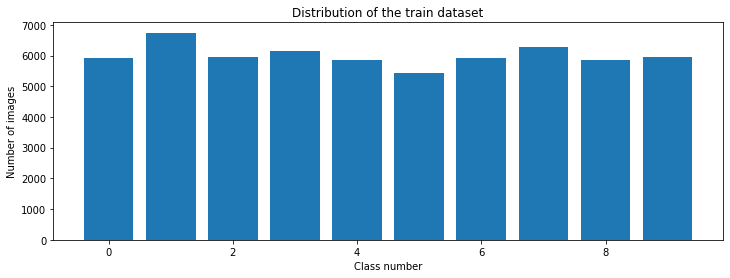

In [71]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1) #Kod CNN mreža, preoblikvoanje ulaznih podataka je drugačije. Na ulaz šaljemo cijelu sliku od 28x28 piksela. 
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [0]:
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu')) #Prvi Konvolucijski sloj
  #Više ne dodajem Dense nego Conv2D, Conv2D koristi određene filtere. 30 označava broj filtera
  #5x5 su dimenzije filtera, 
  model.add(MaxPooling2D(pool_size=(2, 2))) #Prvi pooling sloj
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten()) #Pripremamo podatke za klasičnu NN
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [75]:
model = leNet_model()
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)              

In [76]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.2482 - acc: 0.9199 - val_loss: 0.0499 - val_acc: 0.9857
Epoch 2/10
54000/54000 [==============================] - 1s 23us/step - loss: 0.0714 - acc: 0.9775 - val_loss: 0.0412 - val_acc: 0.9888
Epoch 3/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0629 - acc: 0.9814 - val_loss: 0.0416 - val_acc: 0.9892
Epoch 4/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0487 - acc: 0.9850 - val_loss: 0.0349 - val_acc: 0.9903
Epoch 5/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0435 - acc: 0.9866 - val_loss: 0.0313 - val_acc: 0.9912
Epoch 6/10
54000/54000 [==============================] - 1s 23us/step - loss: 0.0437 - acc: 0.9862 - val_loss: 0.0350 - val_acc: 0.9895
Epoch 7/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0439 - acc: 0.9870 - val_loss: 0.0364 - val_acc:

Text(0.5, 0, 'epoch')

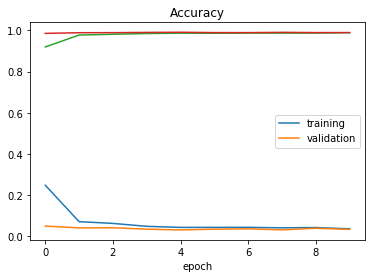

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')
 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [78]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0348593156588252
Test accuracy: 0.99


In [79]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])


Test score: 0.0348593156588252
Test accuracy: 0.99


(1, 28, 28, 1)
(1, 28, 28, 1)
predicted digit: [2]


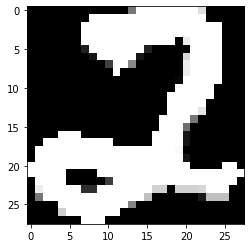

In [80]:
#predict internet number
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #NEŠTO NIJE U REDU
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)
 
print(img.shape)
print("predicted digit: "+str(model.predict_classes(img)))

(1, 24, 24, 30)
(1, 10, 10, 15)


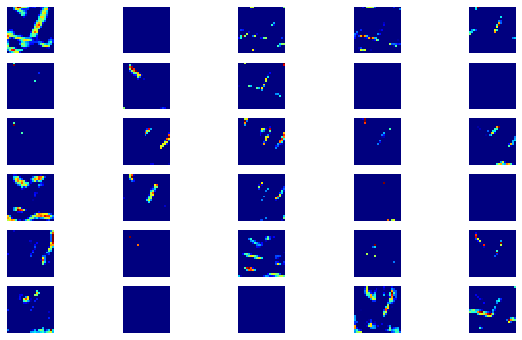

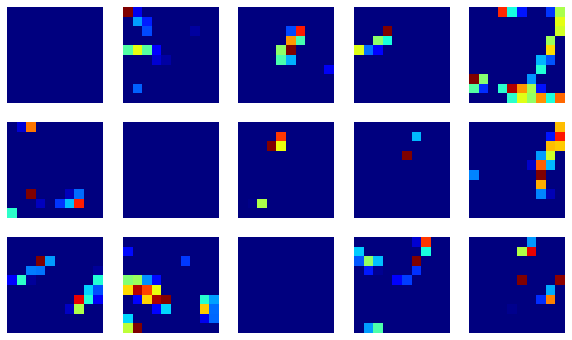

In [81]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
#Svi ulazi modela - inputs; svi željeni izlazi modela - outputs)
#Broj nula označava sloj kojemu pristupamo
 
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape)
print(visual_layer2.shape)
 
#layer 1
plt.figure(figsize=(10, 6)) #Crtam sve slike sloja 1
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
 
#layer 2
plt.figure(figsize=(10, 6)) #Crtam sve slike sloja ?
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')